<a href="https://colab.research.google.com/github/Newtan999/NewML/blob/main/classificacao_doencas_cardiacas/heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IGNORAR

In [ ]:
# Link para download do Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/versions/1?resource=download

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

dados = pd.read_csv('/content/drive/MyDrive/heart.csv', sep=',')

In [ ]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Shape: Linhas e colunas
dados.shape

(918, 12)

In [ ]:
# Contando os valores da coluna 'Age' classificando por índice
dados['Age'].value_counts().sort_index()

,count
Age,
28,1
29,3
30,1
31,2
32,5
33,2
34,7
35,11
36,6


In [ ]:
hist1 = px.histogram(dados, x = 'Age', nbins = 60)
hist1.update_layout(width=800, height = 500, title_text = 'Distribuição das idades')
hist1.show()

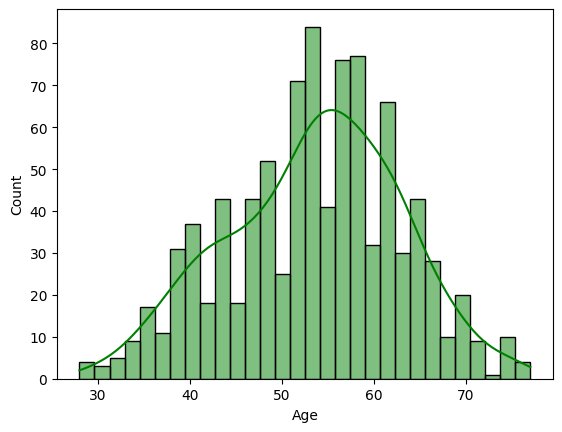

In [ ]:
sns.histplot(dados, x='Age', bins=30, color='green', kde='True', stat='count');

In [ ]:
# Contando os dados da coluna Sexo
dados['Sex'].value_counts()

,count
Sex,
M,725
F,193


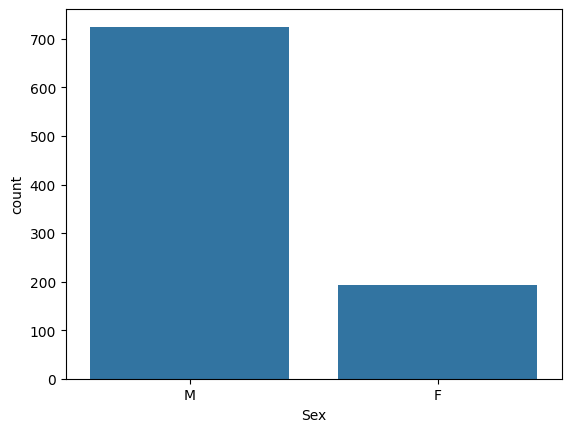

In [ ]:
sns.countplot(x='Sex', data=dados);

In [ ]:
dados['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


ASY: Assintomático
NAP: Dor não anginosa
ATA: Angina atípica
TA: Angina típica

Angina: Dor no peito causada pela diminuição do fluxo de sangue no coração

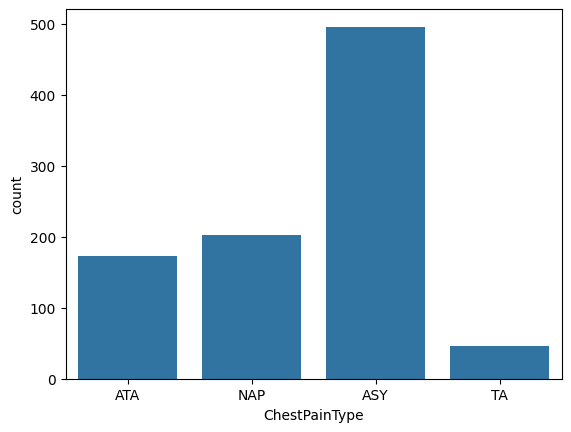

In [ ]:
### Idade usa countplot por ser valor discreto (1, 2, 3, etc.)
sns.countplot(dados, x='ChestPainType');

##### Resting BP: Pressão sanguínea em repouso em mmHG(sistólica)

In [ ]:
dados.RestingBP.value_counts().sort_index()

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


* Há valor zero na pressão, o que está errado

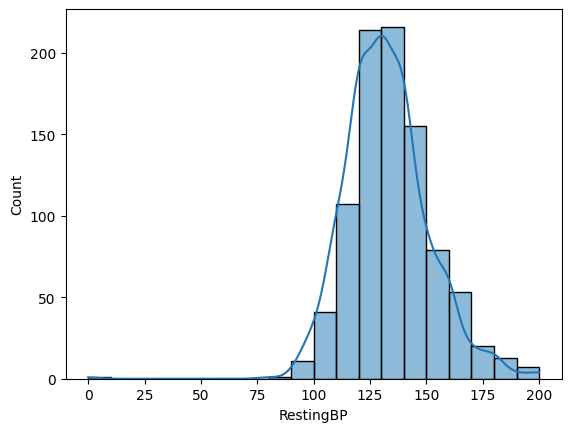

In [ ]:
### Pressão sistólica usa histograma para analisar a distribuição por ter valores contínuos (8.5, 9.2, etc.)
sns.histplot(dados, x='RestingBP', kde = True, bins = 20, stat='count');
# Eixo y utiliza count (contagem)

* Tendência de distribuição normal

#### Cholesterol

<Axes: xlabel='Cholesterol', ylabel='Count'>

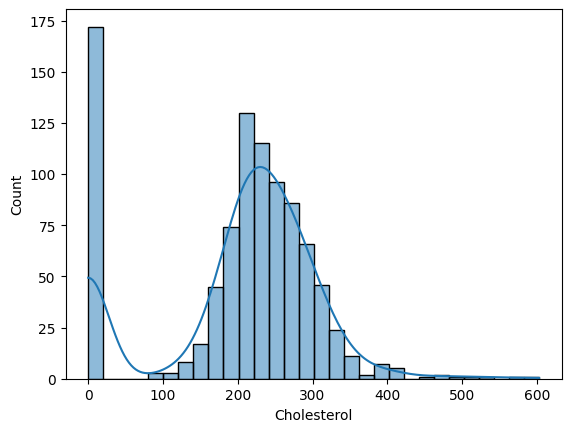

In [ ]:
dados.Cholesterol.value_counts().sort_index()
sns.histplot(dados, x='Cholesterol', kde=True, bins = 30, stat='count')

* Possui valores zero

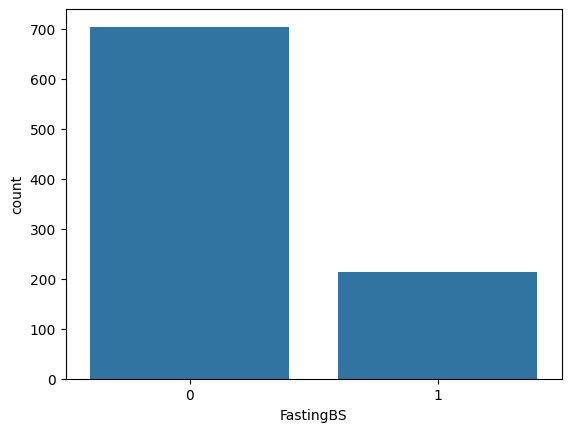

In [ ]:
#### Fasting BS: Açucar no sangue em jejum (mg/dl)
dados.FastingBS.value_counts().sort_index()
sns.countplot(dados, x='FastingBS');


### 0: <120mg/dl (não diabético)
### 1: >=120mg/dl (diabético)

* Variável categórica ordinal

In [ ]:
### Resting ECG: Eletrocardiograma em repouso
dados.RestingECG.value_counts().sort_index()

### Normal: Normal
### LVH: Hipertrofia ventricular esquerda
### ST: Anormalidade da onda ST-T

,count
RestingECG,
LVH,188
Normal,552
ST,178


* Segmento ST: Qualquer desnível do segmento ST, para cima (supradesnível) ou para baixo (infradesnível), deve ser avaliado pois pode corresponder a um infarto agudo do miocárdio.

<Axes: xlabel='RestingECG', ylabel='count'>

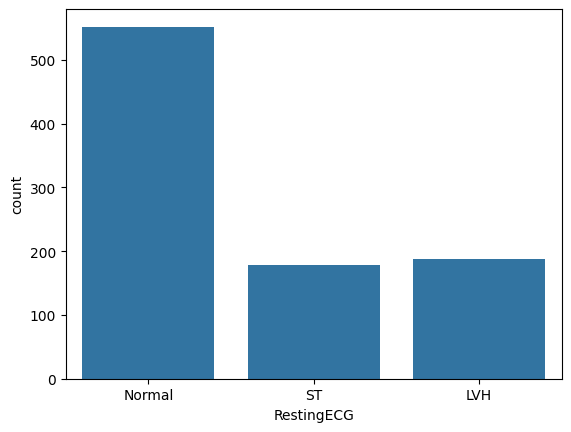

In [ ]:
sns.countplot(dados, x='RestingECG')

#### MaxHr: Frequência cardíaca máxima

In [ ]:
dados.MaxHR.value_counts()

,count
MaxHR,
150,43
140,41
120,36
130,33
160,25
...,...
192,1
195,1
194,1


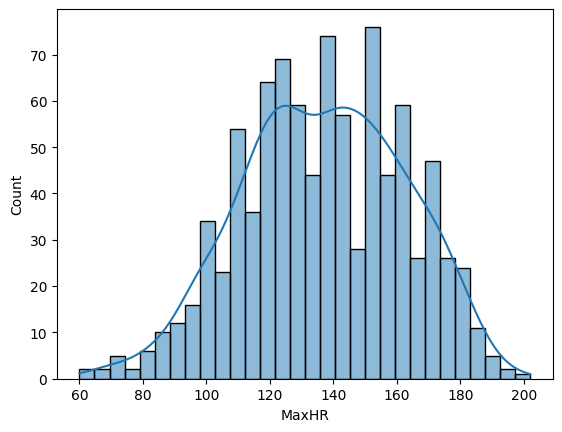

In [ ]:
sns.histplot(dados, x='MaxHR', bins = 30, stat = 'count', kde=True);

##### Exercise Angina: Angina induzida por exercício

In [ ]:
dados['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
px.pie(dados, 'ExerciseAngina')

##### Old Peak: Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso

In [ ]:
dados['Oldpeak'].value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


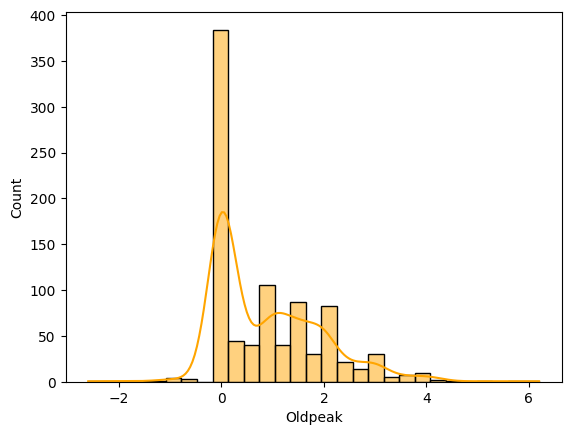

In [ ]:
sns.histplot(dados, x='Oldpeak', kde = True, color = 'orange', stat='count');

##### ST_Slope: Inclinação do segmento ST no ECG

In [ ]:
dados['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
px.pie(dados, 'ST_Slope')

##### Heart Disease: Doença Cardíaca

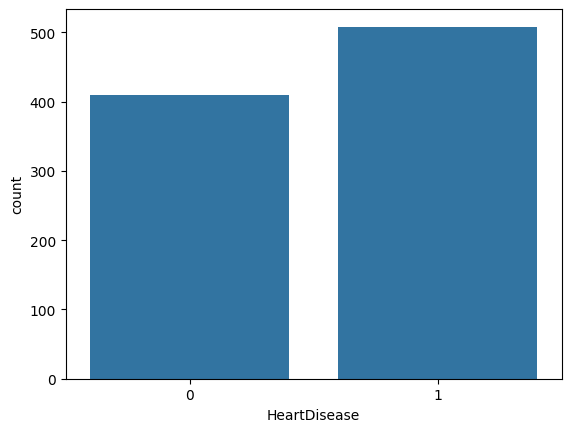

In [ ]:
dados.HeartDisease.value_counts()
sns.countplot(dados, x='HeartDisease');

#### Análise dos tipos de atributos

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos

dados.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


#### Valores Missing (NaN)

In [ ]:
dados.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
### Substituindo pela média
dados.Age.fillna(dados['Age'].mean())

,Age
0,40
1,49
2,37
3,48
4,54
...,...
913,45
914,68
915,57
916,57


In [ ]:
### Análises Estatítistcas Descritivas
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


*   Moda: Valor que mais se repete (54)
* Mediana: Valor que está no meio (54)
* Média: 53.51
* Desvio padrão: O quanto os dados estão espalhados
   



In [ ]:
# Moda
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### Tratando Valores Incoerentes

#### Excluindo registros com pressão zero

In [ ]:
dados2 = dados.copy()

In [ ]:
dados2 = dados.loc[dados.RestingBP !=0]

In [ ]:
dados2['Cholesterol']

,Cholesterol
0,289
1,180
2,283
3,214
4,195
...,...
913,264
914,193
915,131
916,236


#### Substituindo os valores zeros do Colesterol pela média sem os zeros

In [ ]:
### Substituindo os valores zerados da coluna Cholesterol por NaN
dados2['Cholesterol'] = dados2['Cholesterol'].replace(0, np.nan)
#dados2['Cholesterol'] = dados2['Cholesterol'].replace(0, np.nan)

/tmp/ipython-input-3998610011.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# A média agora não considera mais os valores 0
dados2['Cholesterol'].mean()

np.float64(244.6353887399464)

In [ ]:
### Agora, os valores NaN podem ser substituídos pela média
# dados2['Cholesterol'].fillna(dados2.Cholesterol.mean(), inplace = True)
dados2.Cholesterol = dados2['Cholesterol'].fillna(dados2.Cholesterol.mean())

/tmp/ipython-input-2782520623.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados2['Cholesterol'].isnull().sum()

np.int64(0)

In [ ]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


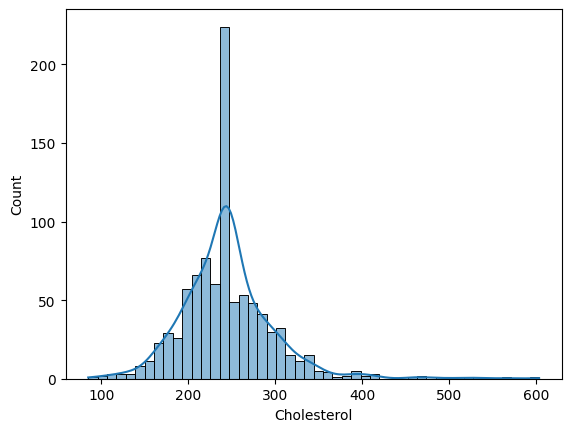

In [ ]:
sns.histplot(dados2, x='Cholesterol', kde = True, stat='count');

#### Outliers

In [ ]:
### Boxplot interativo de idade
px.box(dados2, y='Age')
# sns.boxplot(dados2, y='Age');

In [ ]:
### Boxplot interativo da pressão sanguínea
px.box(dados2, y='RestingBP')

Possui vários outliers

In [ ]:
# Colesterol
px.box(dados2, y = 'Cholesterol')

In [ ]:
### Frequência cardíaca máxima
px.box(dados2, x='MaxHR')

### Salvando o Dataframe tratado

In [ ]:
dados2.to_csv('hear_tratado.csv', sep= ';', encoding = 'utf-8', index='False')

### Pré-Processamento

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/hear_tratado.csv', sep=';', encoding = 'utf-8')

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


### Transformando as variáveis CATEGÓRICAS NOMINAIS em variáveis CATEGÓRICAS ORDINAIS

In [ ]:
df2 = pd.DataFrame.copy(df)

#### Processo manual

In [ ]:
df2['Sex'] = df2['Sex'].replace({'M': 0, 'F': 1})
#
df2['ChestPainType'] = df2['ChestPainType'].replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
#
df2['RestingECG'] = df2['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2})
#
df2['ExerciseAngina'] = df2['ExerciseAngina'].replace({'N': 0, 'Y': 1})
#
df2['ST_Slope'] = df2.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2})

/tmp/ipython-input-2897156226.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-2897156226.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-2897156226.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-2897156226.py:7: FutureWarning:

Downca

### **ATRIBUTOS PREVISORES E ALVO**

In [ ]:
previsores = df2.iloc[:, 1:11].values
previsores

array([[ 40. ,   0. ,   0. , ..., 172. ,   0. ,   0. ],
       [ 49. ,   1. ,   1. , ..., 156. ,   0. ,   1. ],
       [ 37. ,   0. ,   0. , ...,  98. ,   0. ,   0. ],
       ...,
       [ 57. ,   0. ,   2. , ..., 115. ,   1. ,   1.2],
       [ 57. ,   1. ,   0. , ..., 174. ,   0. ,   0. ],
       [ 38. ,   0. ,   1. , ..., 173. ,   0. ,   0. ]])

In [ ]:
previsores.shape

(917, 10)

In [ ]:
alvo = np.array(df2['HeartDisease'])

In [ ]:
alvo.shape

(917,)

In [ ]:
df2.describe()

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,458.510360,53.509269,0.210469,1.452563,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,265.292578,9.437636,0.407864,0.852166,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,0.000000,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,229.000000,47.000000,0.000000,1.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,459.000000,54.000000,0.000000,2.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,688.000000,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,917.000000,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


### **Análise das escalas dos atributos (Escalonamento)**

Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc

array([[-1.43220634, -0.51630861, -1.70548479, ...,  1.38333943,
        -0.82431012, -0.83150225],
       [-0.47805725,  1.9368261 , -0.5313635 , ...,  0.75473573,
        -0.82431012,  0.10625149],
       [-1.75025603, -0.51630861, -1.70548479, ..., -1.52395266,
        -0.82431012, -0.83150225],
       ...,
       [ 0.37007527, -0.51630861,  0.64275778, ..., -0.85606123,
         1.21313565,  0.29380223],
       [ 0.37007527,  1.9368261 , -1.70548479, ...,  1.46191489,
        -0.82431012, -0.83150225],
       [-1.64423947, -0.51630861, -0.5313635 , ...,  1.42262716,
        -0.82431012, -0.83150225]])

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9
0,-1.432206,-0.516309,-1.705485,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502
1,-0.478057,1.936826,-0.531364,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251
2,-1.750256,-0.516309,-1.705485,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502
3,-0.584074,1.936826,0.642758,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128
4,0.052026,-0.516309,-0.531364,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502
...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,1.816879,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802
913,1.536257,-0.516309,0.642758,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860
914,0.370075,-0.516309,0.642758,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802
915,0.370075,1.936826,-1.705485,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502


In [ ]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,7.748558e-18,1.084798e-16,7.767929e-16,-1.869340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-1.705485e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00
25%,-6.900904e-01,-5.163086e-01,-5.313635e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01
50%,5.202558e-02,-5.163086e-01,6.427578e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01
75%,6.881250e-01,-5.163086e-01,6.427578e-01,4.146267e-01,4.194568e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01
max,2.490407e+00,1.936826e+00,1.816879e+00,3.749826e+00,6.721265e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00


### **Codificação de variáveis categóricas**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
previsores2 = df.drop('Unnamed: 0', axis = 1).reset_index(drop=True)
previsores2 = df.iloc[:, 0:11].values

In [ ]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores2[:,1])

In [ ]:
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,3] = LabelEncoder().fit_transform(previsores2[:,3])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,7] = LabelEncoder().fit_transform(previsores2[:,7])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,9] = LabelEncoder().fit_transform(previsores2[:,9])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])

### OneHotEncoder: Criação de variáveis Dummy

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

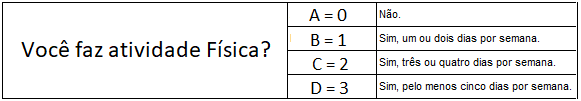

A B C D

1 0 0 0
&nbsp;

0 1 0 0
&nbsp;

0 0 1 0
&nbsp;

0 0 0 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
### Ajuda sobre a função
?ColumnTransformer

In [ ]:
previsores2df = pd.DataFrame(previsores2)
previsores2df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,12,1,1,140,289.0,0,1,98,0,10
1,1,21,0,2,160,180.0,0,1,82,0,20
2,2,9,1,1,130,283.0,0,2,25,0,10
3,3,20,0,0,138,214.0,0,1,34,1,25
4,4,26,1,2,150,195.0,0,1,48,0,10


Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas:
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [ ]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

In [ ]:
previsores3.shape

(917, 232)

### **Escalonamento**

In [ ]:
from sklearn.preprocessing import StandardScaler
previsores3_esc = StandardScaler().fit_transform(previsores3)
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

### **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

### **Redução de dimensionalidade**

Objetivo é selecionar os melhores componentes (atributos) para treinamento do algoritmo, através da análise das correlações entre as variáveis.

### Análise dos Componentes Principais (PCA)

**Seleção de características:** seleciona os melhores atributos e utiliza sem transformações.

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
previsores_pca = pca.fit_transform(previsores2)
previsores_pca.shape

In [ ]:
# Componentes principais
previsores_pca

In [ ]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

In [ ]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

### Kernel PCA

É um algoritmo de aprendizagem não supervisionada.

Aplica-se também em dados linearmente não separáveis.

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=4, kernel='rbf')

previsores_kernel = kpca.fit_transform(previsores2)
previsores_kernel.shape

In [ ]:
previsores_kernel

### **Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)**

- Algoritmo de aprendizagem supervisionada, pois utiliza a classe como referência para seleção.

- Aplicado em situações com muitos atributos previsores e também com o atributo alvo com muitas classes.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
previsores_lda = lda.fit_transform(previsores2, alvo)
previsores_lda

In [ ]:
lda.explained_variance_ratio_

### Salvando as variáveis (atributos)

In [ ]:
# Criando o arquivo
import pickle
# wb para criar o arquivo
arq1 = open('heart.pkl', 'wb')

In [ ]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)
# Fechando o arquivo
arq1.close()

UnsupportedOperation: write

In [ ]:
# Lendo arquivo
arq1 = open('heart.pkl', 'rb')

In [ ]:
alvo = pickle.load(arq1)

In [ ]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

### Base de Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(df2, alvo, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape

(641, 13)

In [ ]:
x_teste.shape

(276, 13)

In [ ]:
y_treino.shape

(641,)

In [ ]:
y_teste.shape

(276,)

## Código ajustado

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
### Carregando os dados
df = pd.read_csv('/content/drive/MyDrive/hear_tratado.csv', sep=';', encoding='utf-8')
df.drop('Unnamed: 0', axis = 1, inplace = True)

### Separando os previsores e variável alvo

In [14]:
X = df.iloc[:, 0:11]
y = df.iloc[:, 11]

In [16]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [11]:
print(df.columns.tolist())

['Unnamed: 0', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [17]:
### Identificando as colunas
col_numericas = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
col_categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

### Pré-processamento (StandardScaler e OneHotEncoder)

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_numericas), # Padronizando as colunas numéricas
        ('cat', OneHotEncoder(), col_categoricas) # Gerando variáveis dummy para colunas categóricas
    ]
)

### Transformando os dados

In [19]:
# Aplicaa as transformações acima nos dados X
X_transform = preprocessor.fit_transform(X)